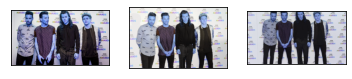

In [6]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from imutils import face_utils
from sklearn.cluster import KMeans

img = cv2.imread('group1.jpg')
img2 = cv2.imread('group2.jpg')
img3 = cv2.imread('group3.jpg')

imgs = [img, img2, img3]

fig, ax = plt.subplots(1, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(imgs[i])
    axi.set(xticks=[], yticks=[])

(12, 136)


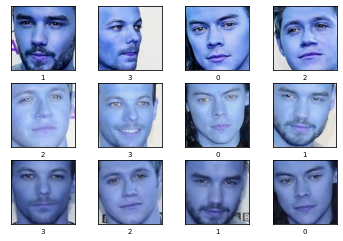

In [7]:

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

num_faces = 0
x = []
cropped = []

for img in imgs:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert pic to gray frame -> lighter image save computational power
    faces = detector(gray_img) # facial detection
    num_faces = max(num_faces, len(faces))
    for face in faces:
        landmarks = predictor(gray_img, face)
        landmarks_np = face_utils.shape_to_np(landmarks)
        x.append(landmarks_np)
        crop_img = img[face.top():face.bottom(),face.left():face.right()]
        cropped.append(crop_img)

xx = np.asarray(x)
nsamples, nx, ny = xx.shape
a = xx.reshape((nsamples,nx*ny))
print(a.shape)

Kmean = KMeans(n_clusters=num_faces)
Kmean.fit(a)
labels = Kmean.labels_

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(cropped[i])
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(labels[i], fontsize=7)